import modules

In [2]:
import torch
from spikingjelly.activation_based import neuron
from spikingjelly import visualizing
from matplotlib import pyplot as plt

In [3]:
#deifine IF neurons layer
if_layer = neuron.IFNode()

In [4]:
#print hidden state or v
print(if_layer.v)

0.0


In [5]:
#feeding in input will change the hidden state
x = torch.rand(size=[2, 3])
if_layer(x)
print(f'x.shape={x.shape}, if_layer.v.shape={if_layer.v.shape}')
# x.shape=torch.Size([2, 3]), if_layer.v.shape=torch.Size([2, 3])
if_layer.reset()

x = torch.rand(size=[4, 5, 6])
if_layer(x)
print(f'x.shape={x.shape}, if_layer.v.shape={if_layer.v.shape}')
# x.shape=torch.Size([4, 5, 6]), if_layer.v.shape=torch.Size([4, 5, 6])
if_layer.reset()

x.shape=torch.Size([2, 3]), if_layer.v.shape=torch.Size([2, 3])
x.shape=torch.Size([4, 5, 6]), if_layer.v.shape=torch.Size([4, 5, 6])


Give the inputs to spiking neurons step-by-step. Check the membrane potential and output spikes, then plot them

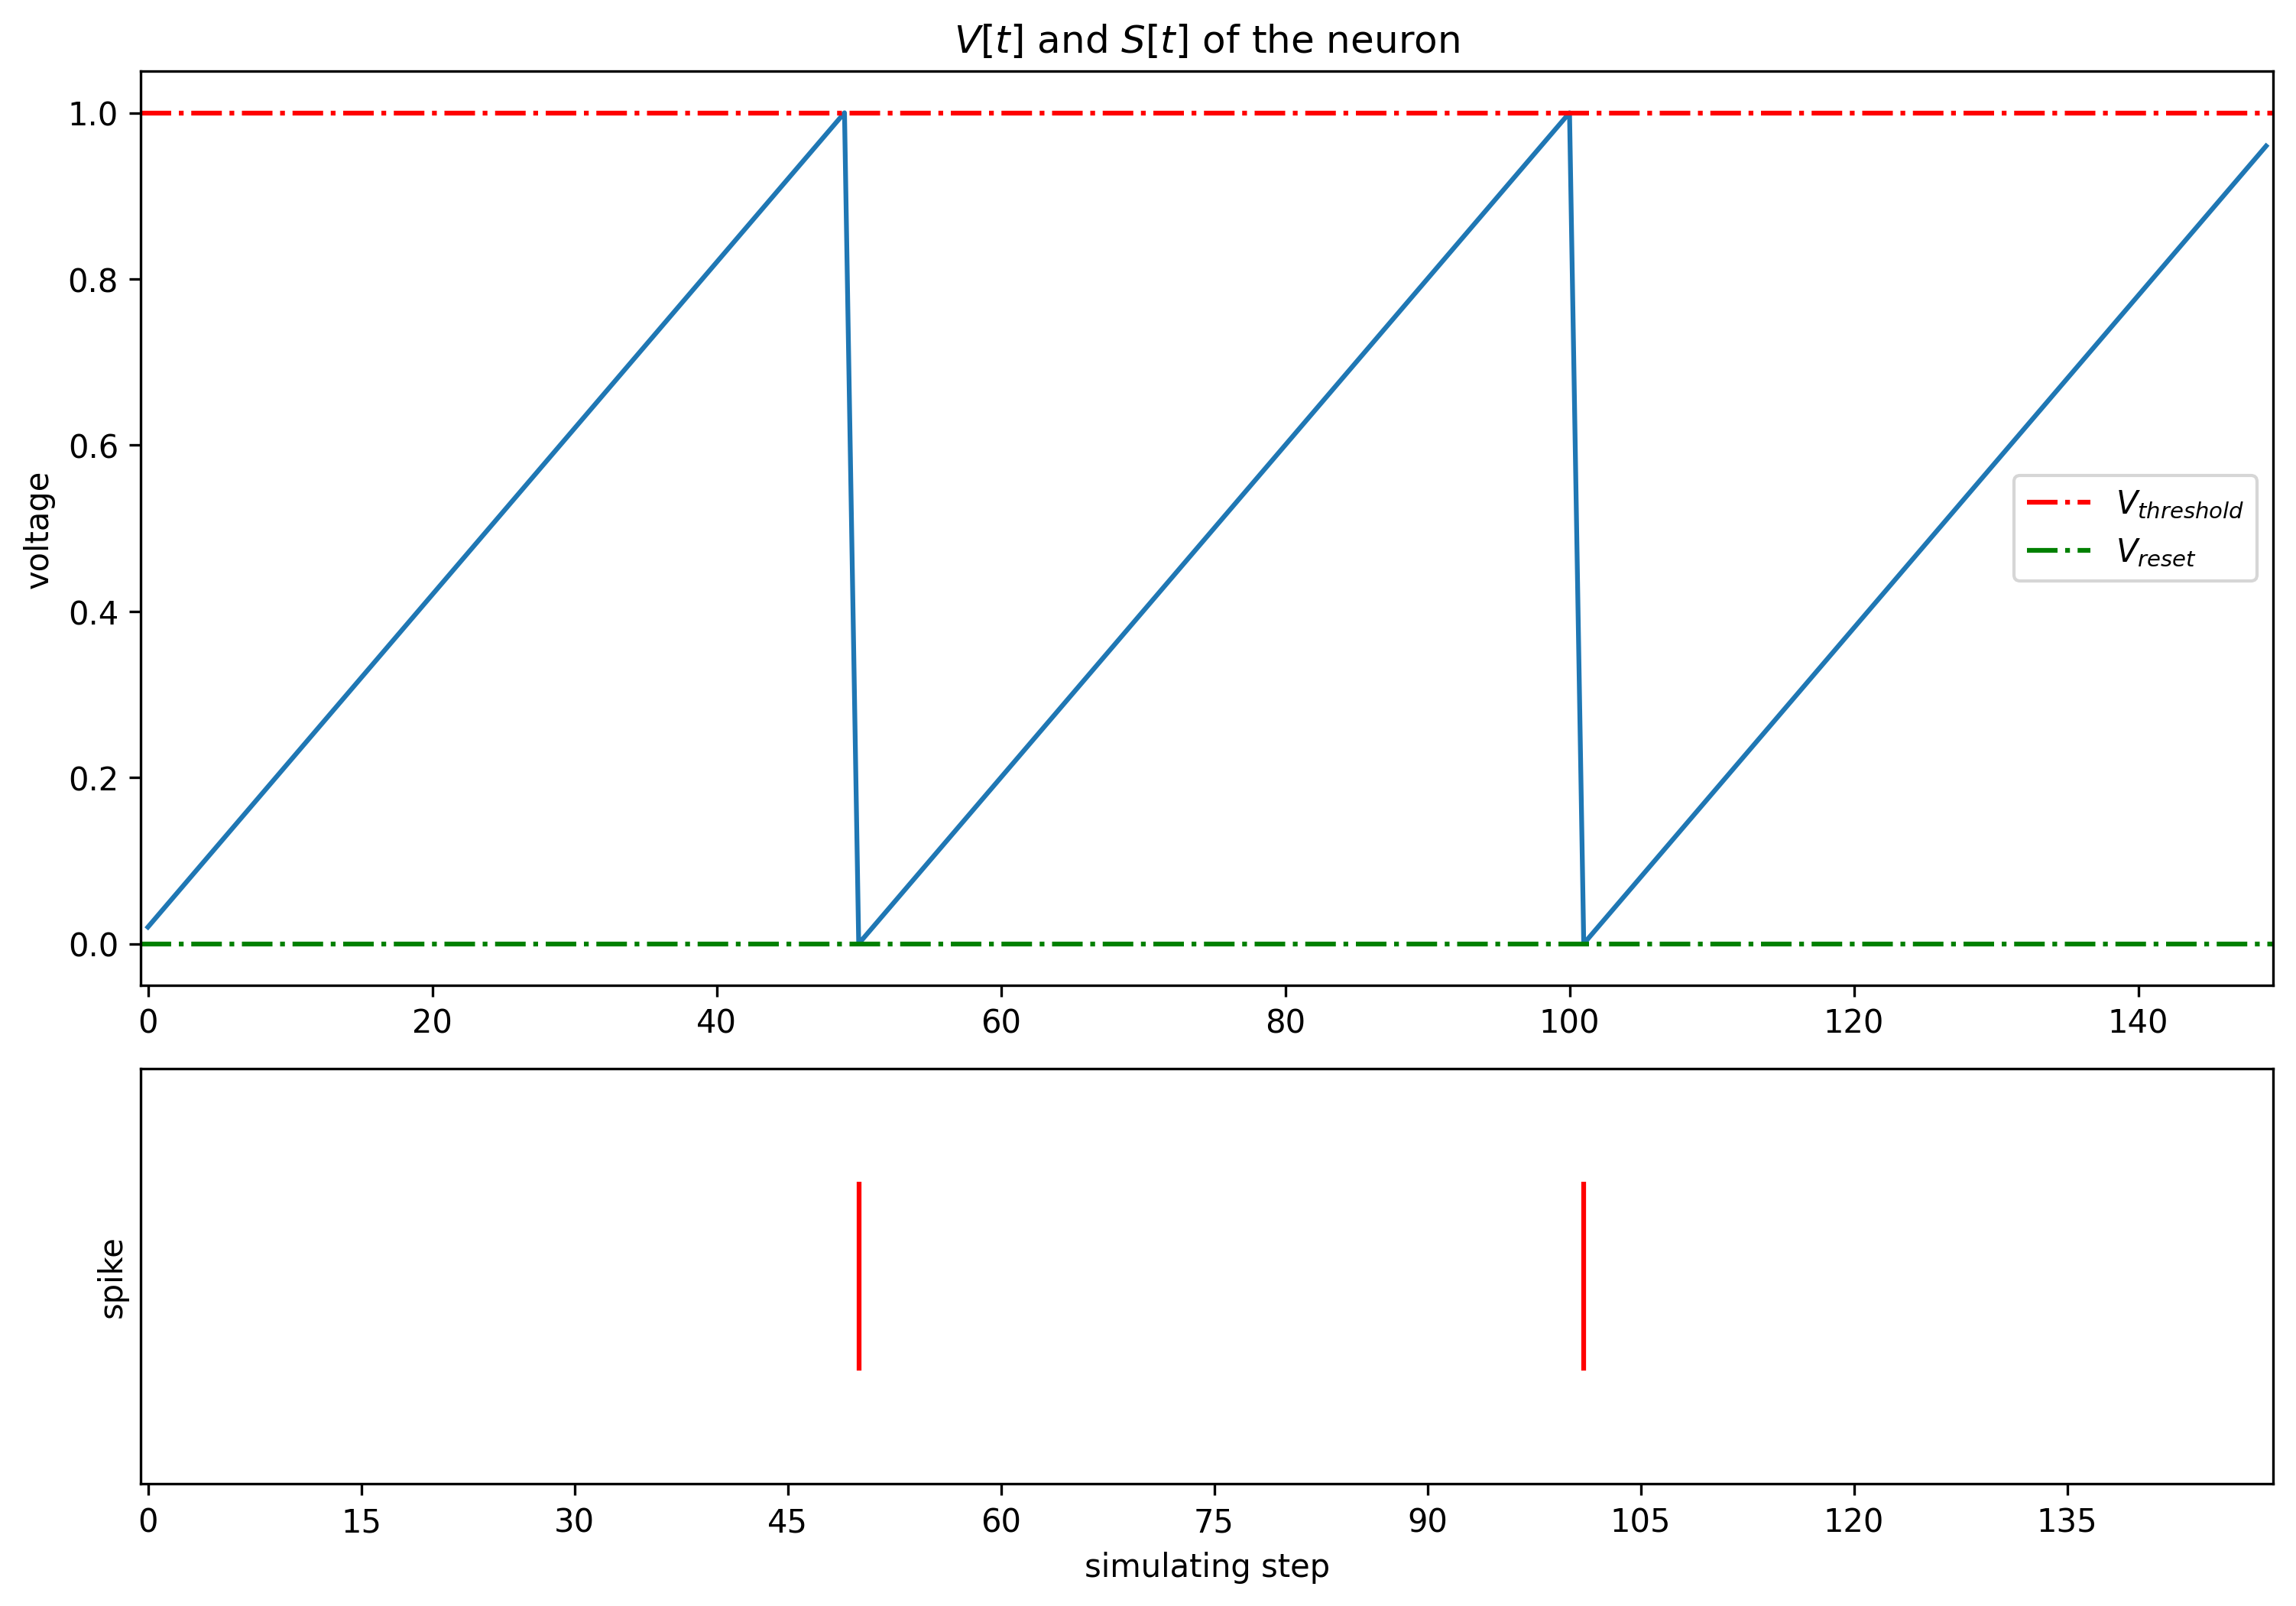

In [6]:
if_layer.reset()
x = torch.as_tensor([0.02])
T = 150
s_list = []
v_list = []
for t in range(T):
    s_list.append(if_layer(x))
    v_list.append(if_layer.v)

dpi = 300
figsize = (12, 8)
visualizing.plot_one_neuron_v_s(torch.cat(v_list).numpy(), torch.cat(s_list).numpy(), v_threshold=if_layer.v_threshold,
                                v_reset=if_layer.v_reset,
                                figsize=figsize, dpi=dpi)
plt.show()

Give an input with shape=[32]. Then you can check the membrane potential and spikes of the 32 neurons

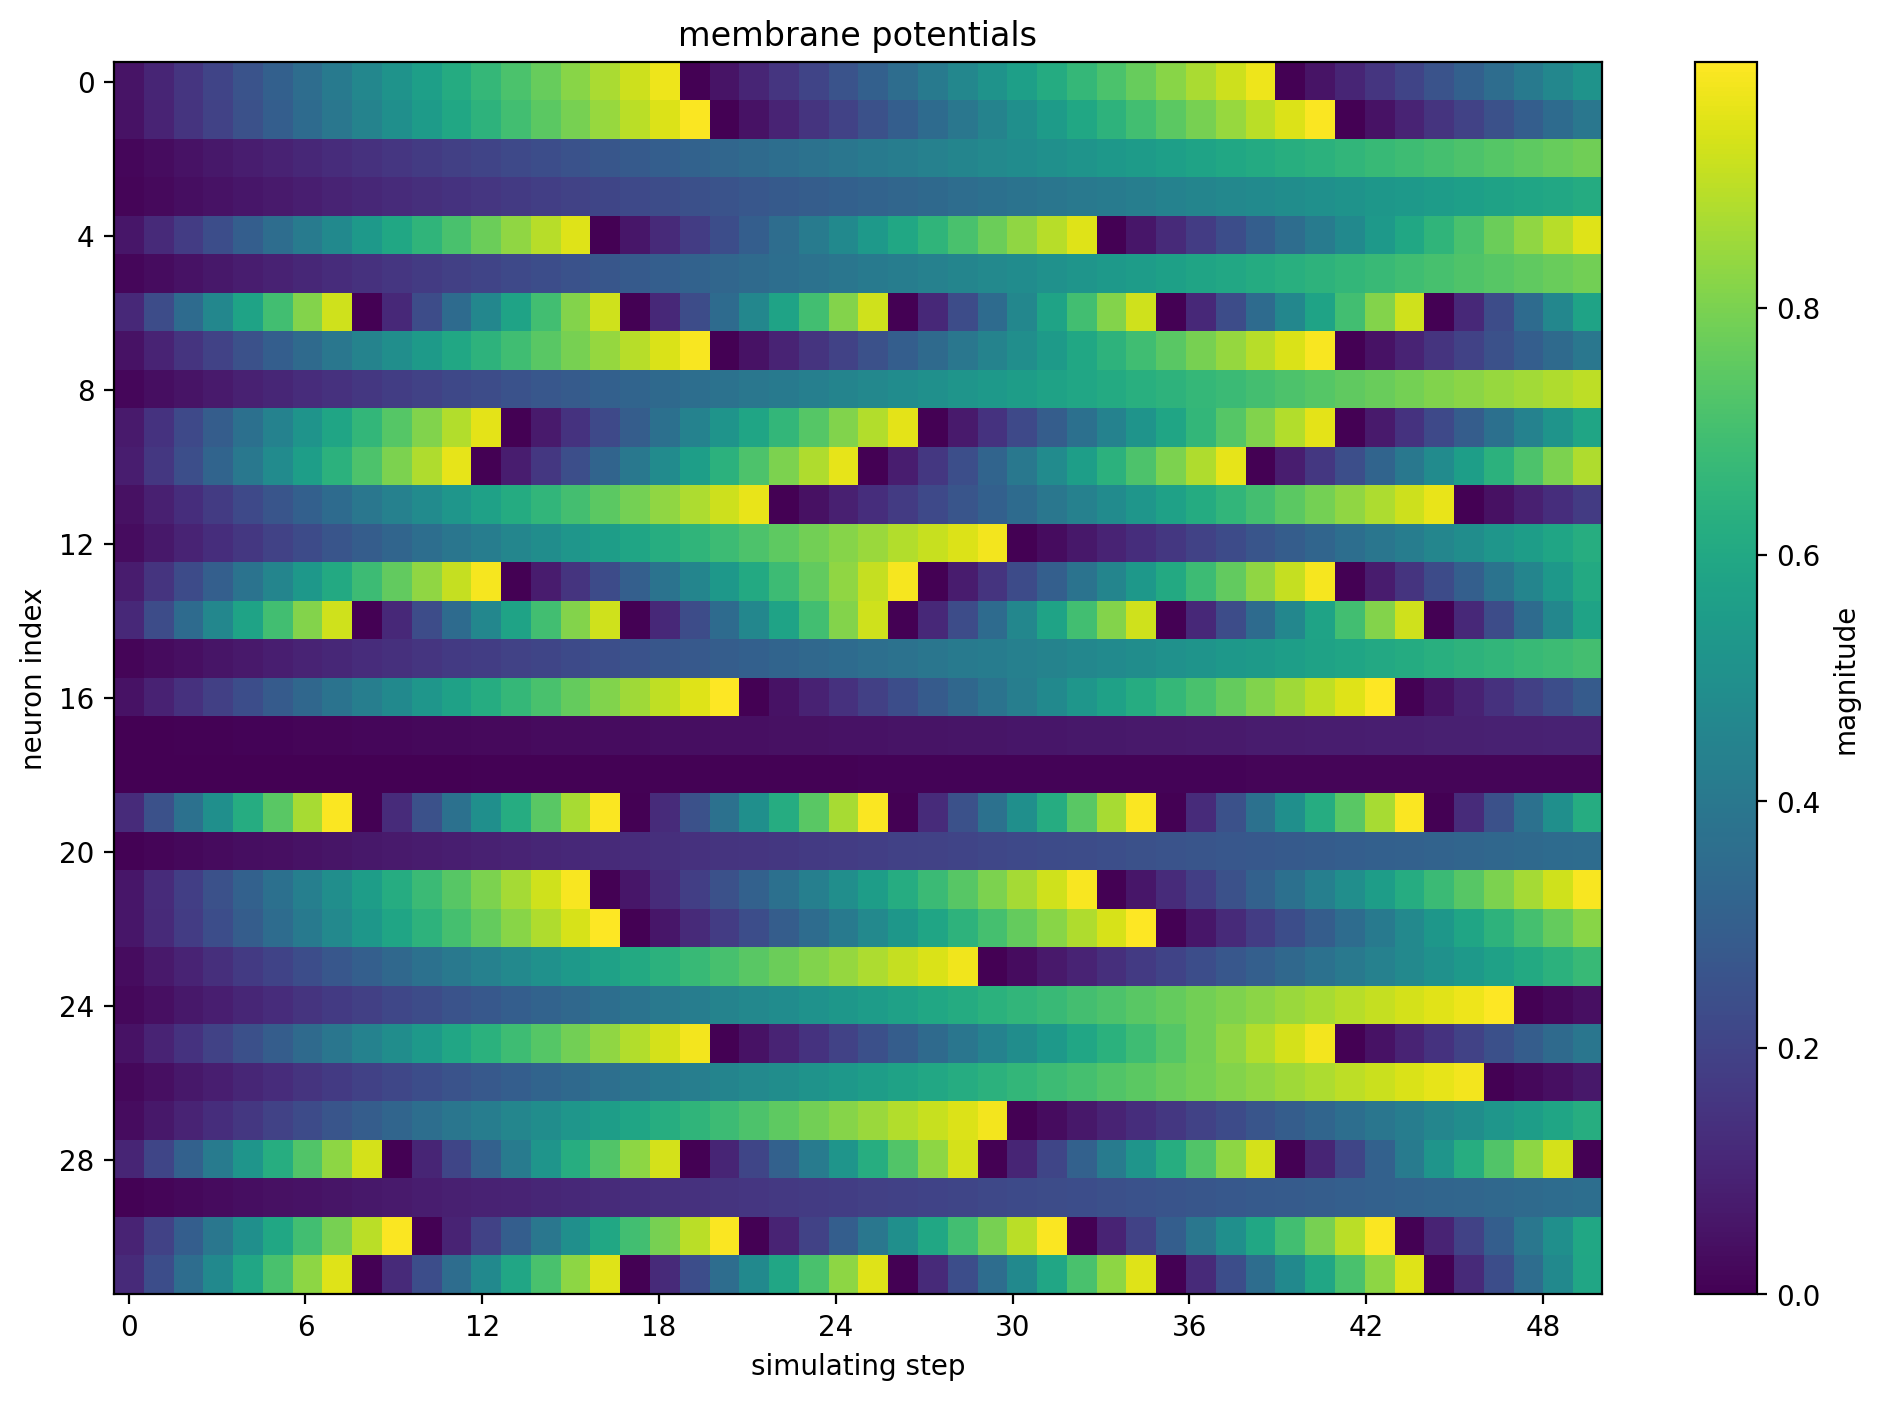

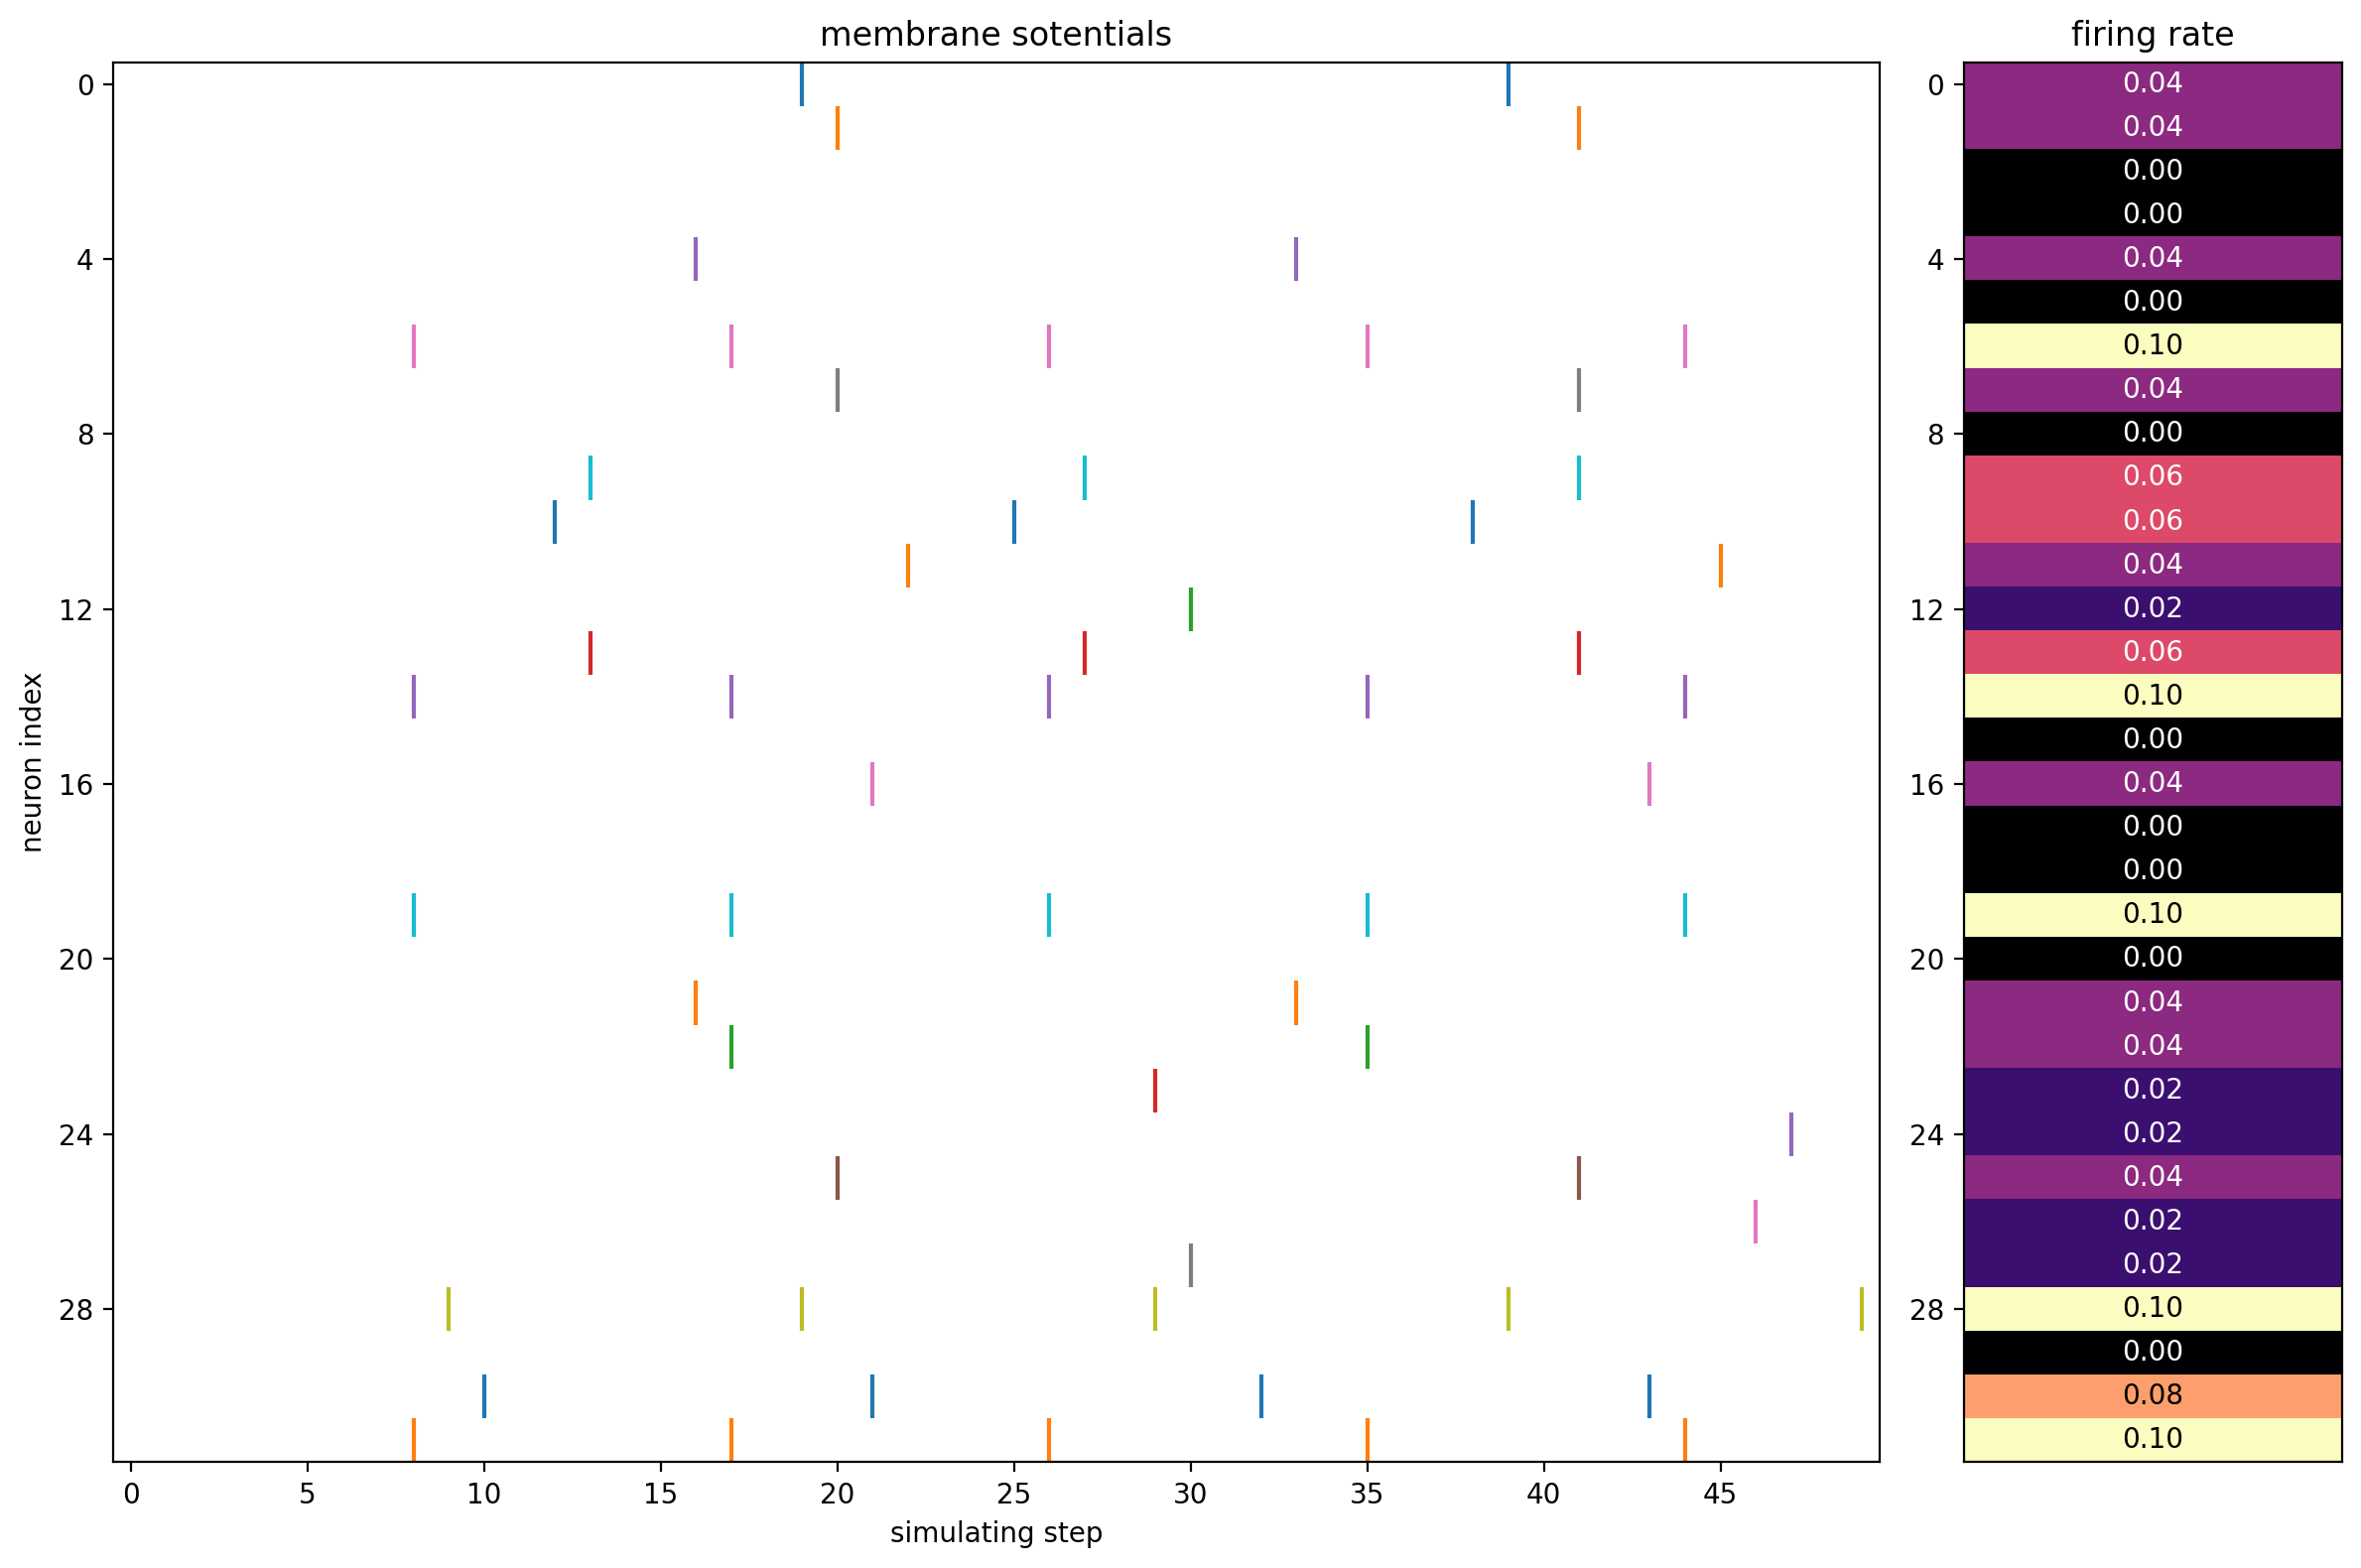

In [7]:
if_layer.reset()
T = 50
x = torch.rand([32]) / 8.
s_list = []
v_list = []
for t in range(T):
    s_list.append(if_layer(x).unsqueeze(0))
    v_list.append(if_layer.v.unsqueeze(0))

s_list = torch.cat(s_list)
v_list = torch.cat(v_list)

figsize = (12, 8)
dpi = 200
visualizing.plot_2d_heatmap(array=v_list.numpy(), title='membrane potentials', xlabel='simulating step',
                            ylabel='neuron index', int_x_ticks=True, x_max=T, figsize=figsize, dpi=dpi)


visualizing.plot_1d_spikes(spikes=s_list.numpy(), title='membrane sotentials', xlabel='simulating step',
                        ylabel='neuron index', figsize=figsize, dpi=dpi)

plt.show()

Change step_mode to multi-step. 

In [8]:
import torch
from spikingjelly.activation_based import neuron, functional
if_layer = neuron.IFNode(step_mode='s')
T = 8
N = 2
x_seq = torch.rand([T, N])
y_seq = functional.multi_step_forward(x_seq, if_layer)
if_layer.reset()

if_layer.step_mode = 'm'
y_seq = if_layer(x_seq)
if_layer.reset()

Some neurons support cupy in multi-step mode. Cupy is really fast. 

In [10]:
import torch
from spikingjelly.activation_based import neuron
if_layer = neuron.IFNode()
print(f'if_layer.backend={if_layer.backend}')
# if_layer.backend=torch

print(f'step_mode={if_layer.step_mode}, supported_backends={if_layer.supported_backends}')
# step_mode=s, supported_backends=('torch',)


if_layer.step_mode = 'm'
print(f'step_mode={if_layer.step_mode}, supported_backends={if_layer.supported_backends}')
# step_mode=m, supported_backends=('torch', 'cupy')

device = 'cuda:0'
if_layer.to(device)
if_layer.backend = 'cupy'  # switch to the cupy backend
print(f'if_layer.backend={if_layer.backend}')
# if_layer.backend=cupy

x_seq = torch.rand([8, 4], device=device)
y_seq = if_layer(x_seq)
if_layer.reset()

if_layer.backend=torch
step_mode=s, supported_backends=('torch',)
step_mode=m, supported_backends=('torch', 'cupy')


ImportError: CuPy is not installed! You can install it from "https://github.com/cupy/cupy".